In [2]:
import sys
# Bu komut tam olarak şu an çalışan Python'a yükleme yapar
!{sys.executable} -m pip install tensorflow matplotlib opencv-python

Başarılı! Klasör yolu doğru: c:\Users\elifv\Desktop\fruit-freshness-research\data\raw\train

--- Veriler Yükleniyor ---
Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.

Tespit Edilen Sınıflar (Etiketler): ['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']


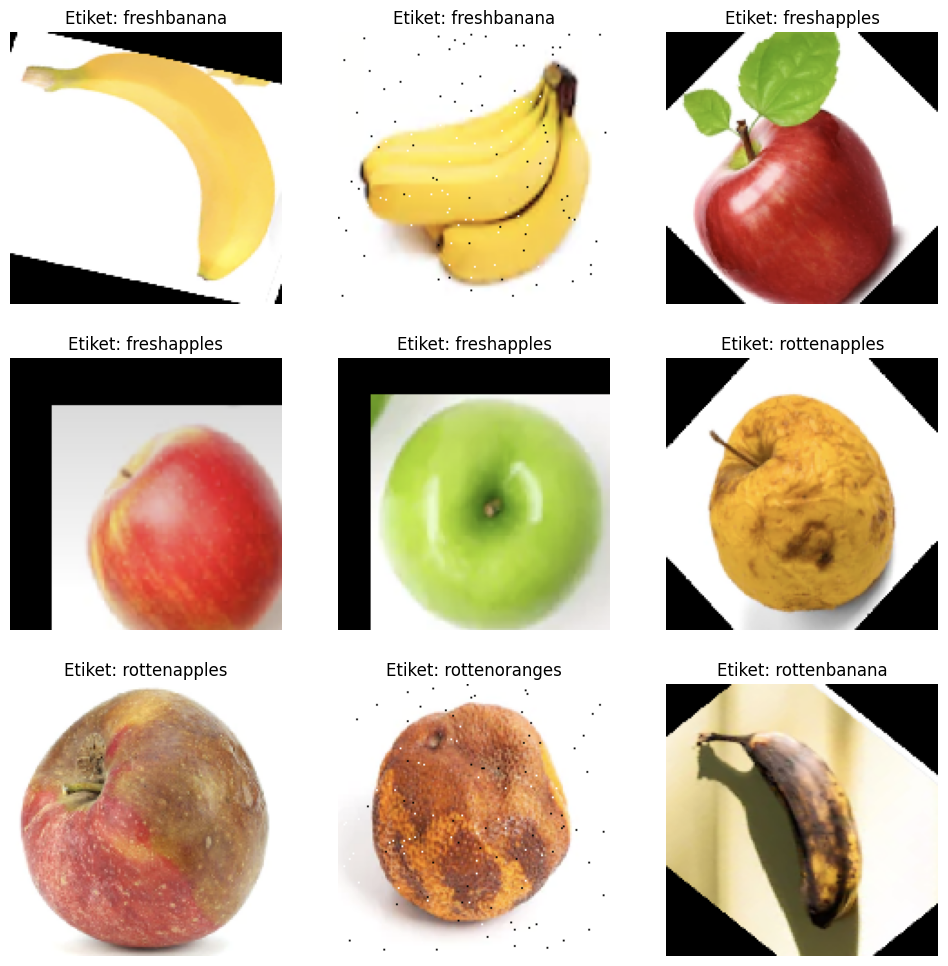

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# --- 1. DOSYA YOLLARINI AYARLAMA ---
# Not: Notebook dosyan 'notebooks' klasöründe olduğu için, 
# bir üst klasöre çıkmak için '../' kullanıyoruz.
base_dir = '../data/raw' 
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Klasörlerin varlığını kontrol edelim (Hata alırsak yol yanlıştır)
if not os.path.exists(train_dir):
    print(f"HATA: Klasör bulunamadı! Aranan yol: {os.path.abspath(train_dir)}")
else:
    print(f"Başarılı! Klasör yolu doğru: {os.path.abspath(train_dir)}")

# --- 2. VERİ ÖN İŞLEME (DATA GENERATOR) ---
# Bilimsel Yöntem Notu: Piksel değerlerini 0-255 aralığından 0-1 aralığına sıkıştırıyoruz (Normalization).
# Bu işlem modelin daha hızlı ve doğru öğrenmesini sağlar.
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

print("\n--- Veriler Yükleniyor ---")

# Eğitim verilerini oku
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), # Tüm resimleri 150x150 piksel boyutuna getir
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Test verilerini oku
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# --- 3. SINIFLARI VE ÖRNEK GÖRÜNTÜLERİ GÖRME ---
class_names = list(train_generator.class_indices.keys())
print(f"\nTespit Edilen Sınıflar (Etiketler): {class_names}")

# Veriden bir paket (batch) alıp görselleştirelim
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(12, 12))
for i in range(9): # İlk 9 resmi göster
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    
    # One-hot encoded etiketi isme çevir
    label_index = list(y_batch[i]).index(1)
    label_name = class_names[label_index]
    
    plt.title(f"Etiket: {label_name}")
    plt.axis("off")

plt.show()